In [171]:
#%%
#Import dependencies
from scipy.ndimage import rotate
import numpy as np
#%matplotlib notebook
import nibabel as nib
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import pandas as pd # for csv.
from matplotlib import cm
from matplotlib.lines import Line2D
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from os.path import exists,split,join,splitext
from os import makedirs
import glob
import requests
from collections import defaultdict
#import nrrd
import torch
from torch.nn.functional import grid_sample
import tornado
import copy
import skimage
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pandas as pd
## OPTION B: skip cell if installed STalign with pip or pipenv
import sys
sys.path.append("../../STalign") 

## import STalign from upper directory
import STalign
image_file = '../visium_data/sccanals26/C1_mod.jpg'
V = plt.imread(image_file)
Vnorm = STalign.normalize(V)
I = Vnorm.transpose(2,0,1)
I=I[0:200,1500:4200,400:3000]

In [172]:
YI= np.array(range(I.shape[1]))*1. # needs to be longs not doubles for STalign.transform later so multiply by 1.
XI = np.array(range(I.shape[2]))*1. # needs to be longs not doubles for STalign.transform later so multiply by 1.
X_=np.arange(0, 1000, 1)
Y_=np.arange(0, 1000, 1)

xI = [Y_,X_]

import SimpleITK as sitk
itkimage = sitk.ReadImage("../atlasVolume/atlasVolume.mhd")
ct_scan = sitk.GetArrayFromImage(itkimage)
A = ct_scan.transpose(2,1,0) 
slice = 220


extentI = STalign.extent_from_x((YI,XI))


In [174]:
pointsIlist = np.load('../visium_data/sccanals26/model_C1_0_points.npy', allow_pickle=True).tolist()
# print(pointsIlist)
pointsJlist = np.load('../visium_data/sccanals26/visum_C1_0_points.npy', allow_pickle=True).tolist()
# print(pointsJlist)
pointsI = []
pointsJ = []

YI = (np.array(range(I.shape[1]))*1.).astype(np.float64) # needs to be longs not doubles for STalign.transform later so multiply by 1.
XI = (np.array(range(I.shape[2]))*1.).astype(np.float64) # needs to be longs not doubles for STalign.transform later so multiply by 1.
for i in pointsIlist.keys():
    for j in range(len(pointsIlist[i])):
        pointsI.append([pointsIlist[i][j][1], pointsIlist[i][j][0]])
for i in pointsJlist.keys():
    for j in range(len(pointsJlist[i])):
        pointsJ.append([pointsJlist[i][j][1], pointsJlist[i][j][0]])
I=I
 
pointsI = np.array(pointsI)
pointsJ = np.array(pointsJ)

In [175]:
I = STalign.normalize((I).astype(np.float64))
if torch.cuda.is_available():
    torch.set_default_device('cuda:0')
else:
    torch.set_default_device('cpu')
L,T = STalign.L_T_from_points(pointsI,pointsJ)

sigmaA = 0.05 #standard deviation of artifact intensities
sigmaB = 0.05 #standard deviation of background intensities
sigmaM = 0.3 #standard deviation of matching tissue intenities

extentI = STalign.extent_from_x((YI,XI))


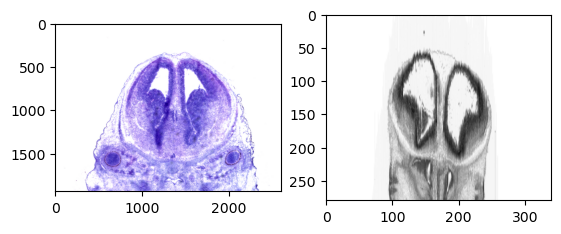

In [179]:
J = (A[slice][None] / np.mean(np.abs(A[slice]),keepdims=True)).astype(np.float64)
J = J[:,:280,:] 
YJ = (np.array(range(J.shape[1]))*1.).astype(np.float64) # needs to be longs not doubles for STalign.transform later so multiply by 1.
XJ = (np.array(range(J.shape[2]))*1.).astype(np.float64) # needs to be longs not doubles for STalign.transform later so multiply by 
slice = 240

j_norm = STalign.normalize(-J)
image_file = '../visium_data/sccanals26/C1_mod.jpg'
V = plt.imread(image_file)
Vnorm = STalign.normalize(V)
I_A1 = Vnorm.transpose(2,0,1)
I_A1=np.flip(I_A1[0:200,1500:4200,400:3000],axis=2)
YI= np.array(range(I_A1.shape[1]))*1. 
XI = np.array(range(I_A1.shape[2]))*1. 
fig,ax = plt.subplots(1,2)
extentJ = STalign.extent_from_x((YJ,XJ))
extentI = STalign.extent_from_x((YI,XI))
j_norm = np.array([j_norm[0],j_norm[0],j_norm[0]])
ax[0].imshow((I_A1.transpose(1,2,0).squeeze()), extent=extentI) 
ax[1].imshow((j_norm.transpose(1,2,0).squeeze()), extent=extentJ)
fig.canvas.draw()  
np.savez('../test/model_C1',x=XI,y=YI,I=I_A1)
np.savez('../test/visum_C1', x=XJ,y=YJ,I=J[0:1])

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+01, 2.2000e+01, 3.0000e+01, 6.5000e+01,
        1.3200e+02, 2.4500e+02, 2.5600e+02, 4.3700e+02, 5.3600e+02,
        6.1000e+02, 6.1700e+02, 6.2700e+02, 6.5100e+02, 7.5400e+02,
        8.7000e+02, 9.9100e+02, 1.1130e+03, 1.1960e+03, 8.8700e+02,
        1.2390e+03, 1.2120e+03, 1.2610e+03, 1.2090e+03, 1.3750e+03,
        1.3090e+03, 1.3590e+03, 1.3260e+03, 1.3030e+03, 1.2330e+03,
        1.1680e+03, 1.0840e+03, 8.1300e+02, 9.4500e+02, 9.5100e+02,
        9.2000e+02, 2.3100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.6206e+04]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

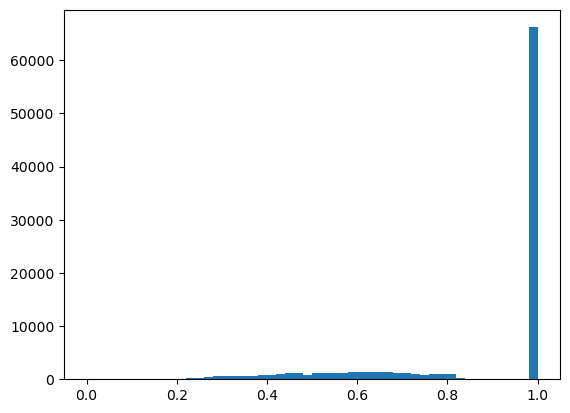

In [78]:

fig, ax = plt.subplots()
ax.hist(STalign.normalize(-J).ravel(), bins=50)

In [49]:
I_A1.shape

(3, 1987, 2600)

In [191]:
%%time
xI=[YI,XI]
err=10000
#[9, 110, 3]
for i in range(-5,5):
    A = ct_scan.transpose(2,1,0) 
    slice = 220+i
    J = (A[slice][None] / np.mean(np.abs(A[slice]),keepdims=True)).astype(np.float64)
    J=J[:,:280,:]
    J[J<1.]=0.
    j_norm = STalign.normalize(-J)
    j_norm = np.vstack((j_norm,j_norm,j_norm))
    XJ = (np.array(range(J.shape[2]))*1.).astype(np.float64)
    YJ = (np.array(range(J.shape[1]))*1.).astype(np.float64)
    extentJ = STalign.extent_from_x((YJ,XJ))
    xJ=[YJ,XJ]
    torch.cuda.empty_cache()
    transform = STalign.LDDMM(
    xI,I,xJ,j_norm,
    L=L,T=T,
    pointsI= pointsI,
    pointsJ=pointsJ,
    nt=9,
    niter=400,
    diffeo_start = 16,
    device='cuda:0',
    a=110,
    p=3,
    sigmaP = 2e-1,
    epL= 5e-11,
    epT= 5e-3,
    epV= 5e-2,
    sigmaA = sigmaA, #standard deviation of artifact intensities
    sigmaB = sigmaB, #standard deviation of background intensities
    sigmaM = sigmaM, #standard deviation of matching tissue intenities
    # muA = muA, #average of artifact intensities
    # muB = muB #average of background intensities
    display=False,
    )
    B = transform['A']
    v = transform['v']
    xv = transform['xv']
    phiI = STalign.transform_image_source_to_target(xv,v,B,[YI,XI],I,[YJ,XJ])
    if phiI.is_cuda:
        phiI = phiI.cpu()
    mse =transform['Errors'][-1]
    print(str(slice)+" : "+str(mse))
    # if mse <err:
    #     err=mse
    #     param=[i]

C:\Users\Albert\AppData\Roaming\Python\Python312\site-packages\torch\utils\_device.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


215 : [14583.92197478613, 14583.921959475208, 1.5310922162410917e-05, 23299.32553924625]
216 : [15095.221180535873, 15095.221166146448, 1.4389424274989589e-05, 23398.49605623939]
217 : [15726.071654858788, 15726.071639517739, 1.534104840348467e-05, 23298.641302494398]
218 : [15822.677311130521, 15822.677295877866, 1.525265531501384e-05, 23288.18976762849]
219 : [14984.055204108525, 14984.055189114148, 1.4994376734131085e-05, 23304.448713369293]
220 : [14704.683584232394, 14704.68356872702, 1.5505374138077336e-05, 23281.550919534704]
221 : [14303.98174171346, 14303.98172856734, 1.3146121067465124e-05, 23302.722244140234]
222 : [14373.22641410388, 14373.226401016225, 1.3087654146990012e-05, 23381.407860807907]
223 : [14723.076451456305, 14723.076435606357, 1.5849948121240352e-05, 23285.212186296274]
224 : [15779.556495280603, 15779.556479107703, 1.6172900558482763e-05, 23284.392992382036]
CPU times: total: 1min 37s
Wall time: 2min 44s


C:\Users\Albert\Documents\GitHub\STalign\docs\notebooks\../../STalign\STalign.py:1304: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axE[2].set_yscale('log')
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


CPU times: total: 24.3 s
Wall time: 42.9 s


C:\Users\Albert\AppData\Roaming\Python\Python312\site-packages\torch\utils\_device.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


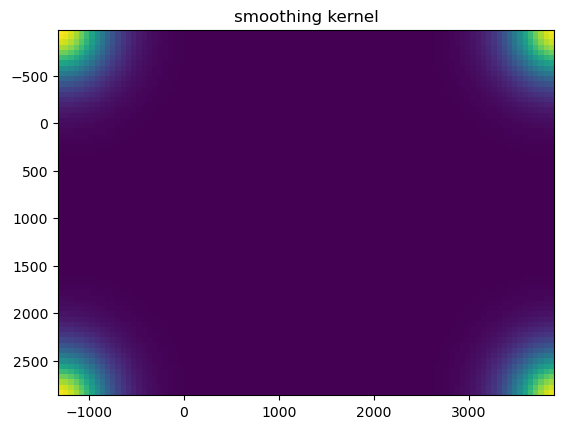

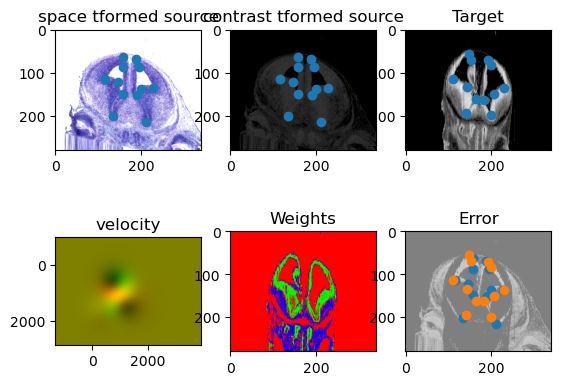

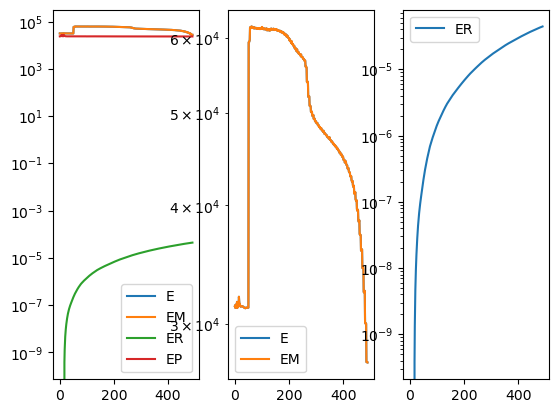

In [169]:
%%time
slice = 233
A = ct_scan.transpose(2,1,0) 
J = (A[slice][None] / np.mean(np.abs(A[slice]),keepdims=True)).astype(np.float64)
J=J[:,:280,:]
J[J<1.]=0.
j_norm = STalign.normalize(J)
j_norm = np.vstack((j_norm,j_norm,j_norm))
XJ = (np.array(range(J.shape[2]))*1.).astype(np.float64)
YJ = (np.array(range(J.shape[1]))*1.).astype(np.float64)
extentJ = STalign.extent_from_x((YJ,XJ))
xJ=[YJ,XJ]
xI=[YI,XI]
xJ=[YJ,XJ]
torch.cuda.empty_cache()
transform = STalign.LDDMM(
xI,I,xJ,j_norm,
L=L,T=T,
pointsI= pointsI,
pointsJ=pointsJ,
nt=9,
niter=500,
diffeo_start = 16,
device='cuda:0',
a=110,
p=3,
sigmaP = 2e-1,
epL= 8e-11,
epT= 5e-3,
epV= 5e-2,
sigmaA = sigmaA, #standard deviation of artifact intensities
sigmaB = sigmaB, #standard deviation of background intensities
sigmaM = sigmaM, #standard deviation of matching tissue intenities
# muA = muA, #average of artifact intensities
# muB = muB #average of background intensities,
display=True,
)
A = transform['A']
v = transform['v']
xv = transform['xv']
phiI = STalign.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])
if phiI.is_cuda:
    phiI = phiI.cpu()
mse =transform['Errors'][-1][0]
#print(mse)

In [166]:
transform['Errors'][-1]

[48264.73176341229,
 48264.73173408361,
 2.9328679845504024e-05,
 23351.135589823152]

In [61]:
transform['Errors'][-1]

[1.3869072536070926e-05,
 1.0216838933156522e-55,
 1.3869072536070926e-05,
 18392.78852442281]

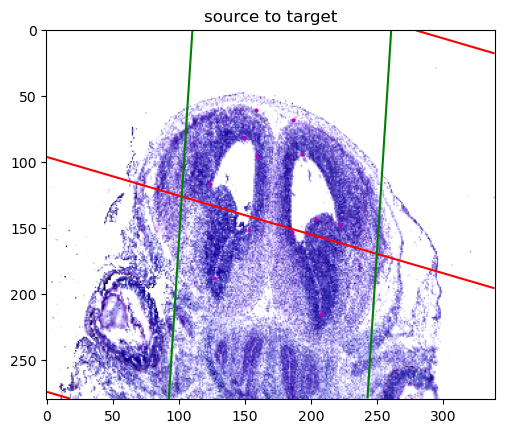

In [68]:
A = transform['A']
v = transform['v']
xv = transform['xv']
WM = transform['WM'].tolist()
WB = transform['WB'].tolist()
WA = transform['WA'].tolist()
phii = STalign.build_transform(xv,v,A,XJ=[YJ,XJ],direction='b')
phiI = STalign.transform_image_source_to_target(xv,v,A,[YI,XI],I,[YJ,XJ])
phiipointsI = STalign.transform_points_source_to_target(xv,v,A,pointsI)
if phii.is_cuda:
    phii = phii.cpu()
if phiI.is_cuda:
    phiI = phiI.cpu()
if phiipointsI.is_cuda:
    phiipointsI = phiipointsI.cpu()
fig,ax = plt.subplots()
levels = np.arange(-100000,100000,1000)
ax.contour(XJ,YJ,phii[...,0],colors='r',linestyles='-',levels=levels)
ax.contour(XJ,YJ,phii[...,1],colors='g',linestyles='-',levels=levels)
ax.set_aspect('equal')
ax.set_title('source to target')
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ)
ax.scatter(phiipointsI[:,1].detach(),phiipointsI[:,0].detach(),s=4,c="m")
mse = ((pointsJ - phiipointsI.numpy())**2).mean(axis=None)
mse =((J - phiI.numpy())**2).mean(axis=None)

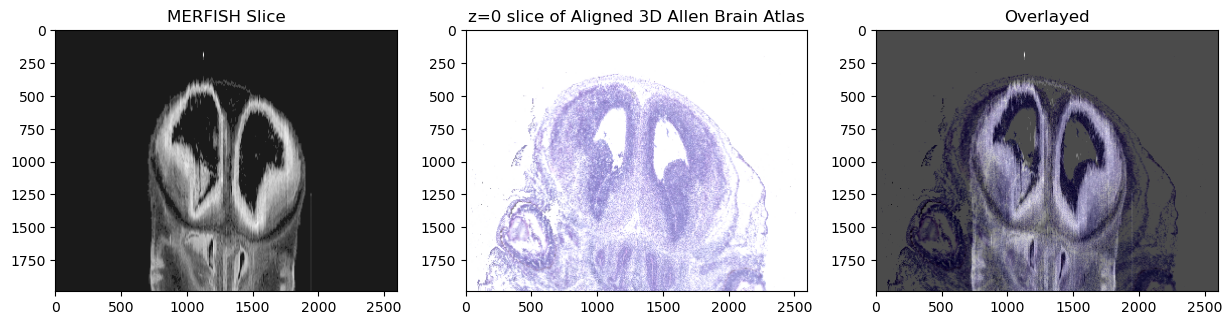

Text(0.5, 1.0, 'After alignment aligned source and target with aligned pointsI and pointsJ')

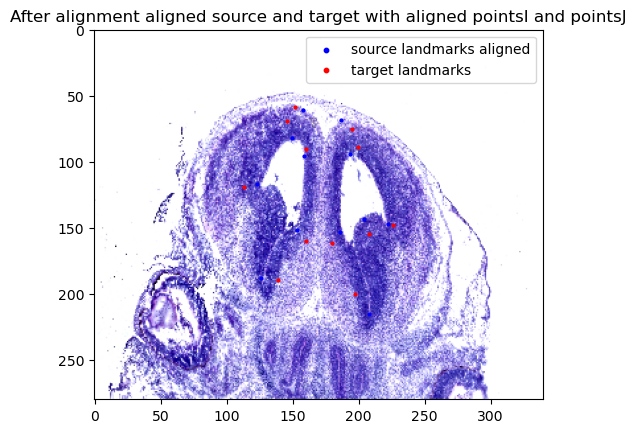

In [90]:
import matplotlib as mpl
It = torch.tensor(I,device='cpu',dtype=torch.float64)
AI = STalign.transform_image_source_with_A(A,xI,I,xJ)
Jt = torch.tensor(j_norm,device='cpu',dtype=torch.float64)
Ishow_target = Jt.permute(1,2,0).cpu()/torch.max(Jt).item()
fig,ax = plt.subplots(1,3, figsize=(15,5))
ax0 = ax[0].imshow(Ishow_target.squeeze(), extent=extentI, cmap = mpl.cm.Blues,alpha=0.9)
ax[0].set_title('MERFISH Slice')
ax1 = ax[1].imshow(AI.permute(1,2,0).cpu().squeeze(), extent=extentI, cmap = mpl.cm.Reds,alpha=0.5)
ax[1].set_title('z=0 slice of Aligned 3D Allen Brain Atlas')
ax2 = ax[2].imshow(Ishow_target.squeeze(), extent=extentI, cmap = mpl.cm.Blues,alpha=1)
ax2 = ax[2].imshow(AI.permute(1,2,0).cpu().squeeze(), extent=extentI, cmap = mpl.cm.Reds,alpha=0.3)
ax[2].set_title('Overlayed')
plt.show()
import matplotlib as mpl
fig,ax = plt.subplots()
ax.imshow((j_norm).transpose(1,2,0),extent=extentJ,alpha=1)
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ, cmap = mpl.cm.Reds,alpha =1)
ax.scatter(phiipointsI[:,1].detach(),phiipointsI[:,0].detach(),c="blue", label='source landmarks aligned', s=4)
ax.scatter(pointsJ[:,1],pointsJ[:,0], c='red', label='target landmarks', s=4)
ax.set_aspect('equal')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])
ax.set_title('After alignment aligned source and target with aligned pointsI and pointsJ')

In [14]:
#I=I[0:200,1500:4200,400:3000]
fname = '../visium_data/sccanals26/A1_tissue_positions.csv'
df1 = pd.read_csv(fname)
df1=df1[df1["in_tissue"]==1]
df1=df1[df1["pxl_col_in_fullres"]>400]
df1=df1[df1["pxl_col_in_fullres"]<3000]
df1=df1[df1["pxl_row_in_fullres"]>1500]
df1=df1[df1["pxl_row_in_fullres"]<4200]
xI = (np.array(df1['pxl_col_in_fullres']-400)).astype(np.float64)
yI = (np.array(df1['pxl_row_in_fullres']-1500)).astype(np.float64)

In [21]:
A

tensor([[ 1.7049e-01,  4.6520e-02, -9.3123e+01],
        [-1.9291e-02,  1.5141e-01, -3.2285e+01],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0',
       dtype=torch.float64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'mpl' is not defined

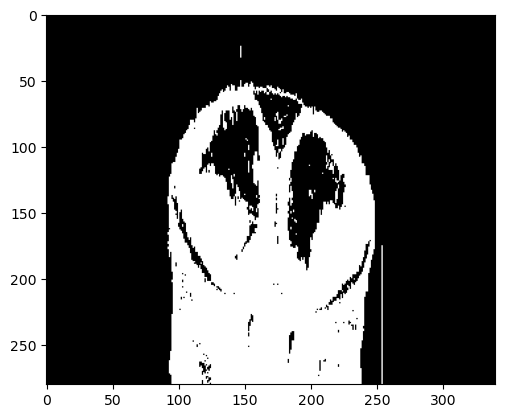

In [16]:

tpointsI= STalign.transform_points_source_to_target(xv,v,A, np.stack([yI, xI], 1))
#switch tensor from cuda to cpu for plotting with numpy
if tpointsI.is_cuda:
    tpointsI = tpointsI.cpu()
# switch from row column coordinates (y,x) to (x,y)
xI_LDDMM = tpointsI[:,1]
yI_LDDMM = tpointsI[:,0]
fig,ax = plt.subplots()
ax.imshow((J).transpose(1,2,0),extent=extentJ,alpha=1)
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ, cmap = mpl.cm.Reds,alpha =0.6)
ax.scatter(xI_LDDMM,yI_LDDMM,s=1,alpha=0.3, label = 'source aligned')
ax.set_aspect('equal')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])    
ax.set_title('After alignment aligned source and target with aligned pointsI and pointsJ', fontsize=15)
plt.savefig("my_plot.png")

In [29]:
df1["pxl_row_transformed"]=yI_LDDMM.numpy().astype(int).tolist()
df1["pxl_column_transformed"]=xI_LDDMM.numpy().astype(int).tolist()

In [89]:
cellprob=pd.read_csv("class_prediction_table_v1.txt",header=0,sep=",")
cellprob=cellprob[(cellprob["project"]=="SCCANALS26") &(cellprob["genotype"]=="WT")&(cellprob["litter"]=="SCC26_L1") ]
cellprob["cell_barcode"]=cellprob["cell_barcode"].apply(lambda x: x.split("_")[0])

In [107]:
cellprob=pd.read_csv("class_prediction_table_v1.txt",header=0,sep=",")
cellprob[["sample","project","litter"]].drop_duplicates()

,sample,project,litter
0,BA2142,SCCANALS26,SCC26_L1
2029,BA2143,SCCANALS26,SCC26_L2
4082,BA2144,SCCANALS26,SCC26_L3
6055,BA2145,SCCANALS26,SCC26_L4
8001,BA2146,SCCANALS27,SCC27_L1
9650,BA2147,SCCANALS27,SCC27_L2
11022,BA2148,SCCANALS27,SCC27_L3
12993,BA2149,SCCANALS27,SCC27_L4
15199,BA4154,SCCANALS28,SCC28_L1
17489,BA4155,SCCANALS28,SCC28_L2


In [33]:
Y_to_pred=pd.merge(df1,cellprob, left_on="barcode",right_on="cell_barcode")

In [110]:
%%time
from os import listdir
from os.path import isfile, join,isdir
import random
itkimage = sitk.ReadImage("../atlasVolume/atlasVolume.mhd")
mypath="./gen-download/gen_list"
onlyfiles = [f for f in listdir(mypath) if isdir(join(mypath, f))]
onlyfiles=random.sample(onlyfiles,10)
X_for_pred=Y_to_pred[["pxl_row_in_fullres","pxl_col_in_fullres","pxl_row_transformed","pxl_column_transformed"]]
X_for_pred.set_index(["pxl_row_transformed","pxl_column_transformed"], inplace=True)
for i in range(len(onlyfiles)):
    #if onlyfiles[i] not in X_for_pred:
     #           X_for_pred.loc[:,onlyfiles[i]] = 0.
    files=listdir(mypath+"/"+onlyfiles[i])
    for j in files:
        if ".mhd" in j :
            
            gen = sitk.ReadImage(mypath+"/"+onlyfiles[i]+"/"+j)
            gen=sitk.Resample(gen,itkimage)
            gen = sitk.GetArrayFromImage(gen)        
            gen = gen.transpose(2,1,0)
            gen = (gen[slice][None] / np.mean(np.abs(gen[slice]),keepdims=True)).astype(np.float64)  
            gen=gen[:,:280,:]
            gen[gen<0.]=0.
            

            df = pd.DataFrame(gen[0]).stack().rename_axis(['pxl_row_transformed', 'pxl_column_transformed']).reset_index(name=onlyfiles[i])
            df.set_index(['pxl_row_transformed', 'pxl_column_transformed'], inplace=True)
    X_for_pred=X_for_pred.join(df, how='left')

NameError: name 'Y_to_pred' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


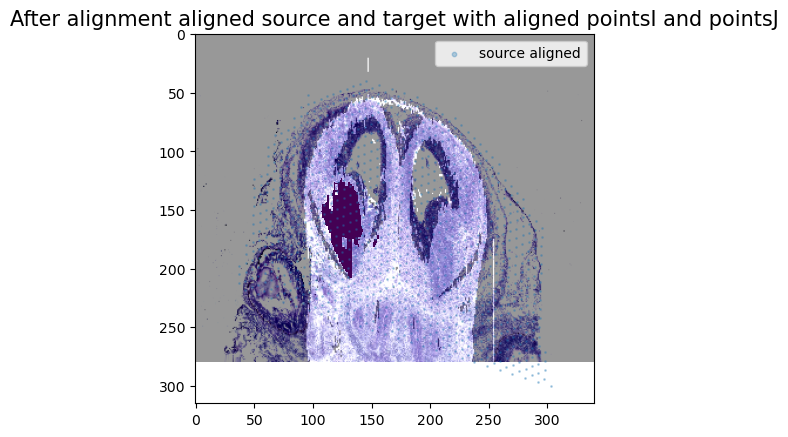

In [36]:
import SimpleITK as sitk
itkimage = sitk.ReadImage("../atlasVolume/estriat-Segment_15861-label.mhd")
ct_scan = sitk.GetArrayFromImage(itkimage)
estriat = ct_scan.transpose(2,1,0) 
slice = 220-3
es = (estriat[slice][None] / np.mean(np.abs(estriat[slice]),keepdims=True)).astype(np.float64)
es=es[:,:280,:]
es[es<1.]=None
tpointsI= STalign.transform_points_source_to_target(xv,v,A, np.stack([yI, xI], 1))
#switch tensor from cuda to cpu for plotting with numpy
if tpointsI.is_cuda:
    tpointsI = tpointsI.cpu()
# switch from row column coordinates (y,x) to (x,y)
xI_LDDMM = tpointsI[:,1]
yI_LDDMM = tpointsI[:,0]
fig,ax = plt.subplots()
ax.imshow((J).transpose(1,2,0),extent=extentJ,alpha=1)
ax.imshow(phiI.permute(1,2,0)/torch.max(phiI),extent=extentJ, cmap = mpl.cm.Reds,alpha =0.6)
ax.imshow((es).transpose(1,2,0),extent=extentJ,alpha=1)
ax.scatter(xI_LDDMM,yI_LDDMM,s=1,alpha=0.3, label = 'source aligned')
ax.set_aspect('equal')
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legend_handles:
    handle.set_sizes([10.0])    
ax.set_title('After alignment aligned source and target with aligned pointsI and pointsJ', fontsize=15)
plt.savefig("my_plot.png")

In [75]:
X_for_pred["is_in_striatum"]=0
for index, row in Y_to_pred.iterrows():
        if (row["pxl_row_transformed"]>=280):
            []       
        else:
            X_for_pred.loc[index,"is_in_striatum"]=es[0,row["pxl_row_transformed"],row["pxl_column_transformed"]]

C:\Users\Albert\AppData\Local\Temp\ipykernel_13852\2701449166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_for_pred["is_in_striatum"]=0


In [79]:
len(X_for_pred[X_for_pred["is_in_striatum"]>100])

45

In [101]:
itkimage = sitk.ReadImage("../atlasVolume/estriat-Segment_15861-label.mhd")
ct_scan = sitk.GetArrayFromImage(itkimage)
estriat = ct_scan.transpose(2,1,0) 
slice = 220
es = (estriat[slice][None] / np.mean(np.abs(estriat[slice]),keepdims=True)).astype(np.float64)
es=es[:,:280,:]


es = pd.DataFrame(es[0]).stack().rename_axis(['pxl_row_transformed', 'pxl_column_transformed']).reset_index(name="is_estriatum")
es.set_index(['pxl_row_transformed', 'pxl_column_transformed'], inplace=True)

In [38]:
X_for_pred=X_for_pred.join(es, how='left')

In [39]:
Y_to_pred.set_index(["pxl_row_transformed","pxl_column_transformed"], inplace=True)
Y_to_pred=Y_to_pred.join(es, how='left')

In [40]:
X_for_pred=X_for_pred[X_for_pred["is_estriatum"]>0]
X_for_pred.to_excel("X_SC26_A1.xlsx")

In [41]:
Y_to_pred=Y_to_pred[Y_to_pred["is_estriatum"]>0]
Y_to_pred.to_excel("Y_SC26_A1.xlsx")

In [42]:
variance=X_for_pred.var(ddof=0)

In [43]:
X_name=X_for_pred.columns

In [44]:
y=Y_to_pred[[ 'NPC', 'Cortical IP', 'Embryonic dSPN',
       'Oligodendrocyte', 'Interneuron']]

In [45]:
X=X_for_pred[X_name[:-1]]

In [47]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=5)
pls2.fit(X, y)
Y_pred = pls2.predict(X)

In [95]:
ct_scan.shape

(340, 673, 552)

In [99]:
j_norm.shape

(3, 280, 340)

In [107]:
es

is_estriatum
pxl_row_transformed pxl_column_transformed              
0                   0                                0.0
                    1                                0.0
                    2                                0.0
                    3                                0.0
                    4                                0.0
...                                                  ...
279                 335                              0.0
                    336                              0.0
                    337                              0.0
                    338                              0.0
                    339                              0.0

[95200 rows x 1 columns]

In [ ]:
1.810 95.200 

In [ ]:
76   4.042

In [130]:
%%time
from os import listdir
from os.path import isfile, join,isdir
import random
itkimage = sitk.ReadImage("../atlasVolume/atlasVolume.mhd")
mypath="./gen-download/gen_list"
onlyfiles = [f for f in listdir(mypath) if isdir(join(mypath, f))]
onlyfiles=random.sample(onlyfiles,10)
for i in range(len(onlyfiles)):
    #if onlyfiles[i] not in X_for_pred:
     #           X_for_pred.loc[:,onlyfiles[i]] = 0.
    files=listdir(mypath+"/"+onlyfiles[i])
    for j in files:
        if ".mhd" in j :
            
            gen = sitk.ReadImage(mypath+"/"+onlyfiles[i]+"/"+j)
            gen2 = sitk.Resample(gen,itkimage)
            gen = sitk.GetArrayFromImage(gen)        
            gen = gen.transpose(2,1,0)
            gen2 = sitk.GetArrayFromImage(gen2)        
            gen2 = gen2.transpose(2,1,0)
            gen2 = (gen2[slice][None] / np.mean(np.abs(gen2[slice]),keepdims=True)).astype(np.float64)
            gen = (gen[20][None] / np.mean(np.abs(gen[20]),keepdims=True)).astype(np.float64)  
            gen2 = gen2[:,:280,:]
            gen2[gen2<0.] = 0.
            gen = gen[:,:28,:]
            gen[gen<0.] = 0.
            

            


CPU times: total: 23.2 s
Wall time: 4.74 s


In [132]:
df = pd.DataFrame(gen[0]).stack().rename_axis(['pxl_row_transformed', 'pxl_column_transformed']).reset_index(name=onlyfiles[i])
df1 = pd.DataFrame(gen2[0]).stack().rename_axis(['pxl_row_transformed', 'pxl_column_transformed']).reset_index(name=onlyfiles[i])

In [120]:
df

,pxl_row_transformed,pxl_column_transformed,Nckap1
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
...,...,...,...
95195,279,335,0.0
95196,279,336,0.0
95197,279,337,0.0
95198,279,338,0.0
